#数据挖掘互评作业三：分类与预测#
##数据集：Video Game Sales 电子游戏销售分析##

##1、导入并展示数据##
数据介绍：包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据，11个字段共1.66W数据量，
字段包括：
RANK-总销售额的排名
Name-游戏的名字
Platform-游戏发布平台(即PC,PS4等)
Year-游戏发行的年份
Genre-游戏的类型
Publisher-游戏的出版者
NA_Sales -北美销售额(百万)
EU_Sales -欧洲销售额(百万)
JP_Sales -日本销售额(百万)
Other_Sales—世界其他地区销售额(百万)
Global_Sales—全球销售总额。

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#导入数据
data = pd.read_csv('vgsales.csv')
print('数据行数:'+str(data.shape[0]))
print('数据列数:'+str(data.shape[1]))
print("每个变量数据类型:")
print(data.dtypes)
print("数据前五行:")
data.head()

数据行数:16598
数据列数:11
每个变量数据类型:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
数据前五行:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##2、电子游戏市场分析##

###2.1 最受欢迎的游戏###

In [3]:
name = pd.pivot_table(data,columns='Name',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
name = pd.DataFrame(data=name,columns={'Global_sales'})
name.head()

,Global_sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82


将数据按游戏名聚类，计算每种游戏的全球总销售额并降序排序
可以看出最受欢迎的前五种游戏分别是：Wii Sports、Wii Sports、Super Mario Bros.、Tetris、Mario Kart Wii

###2.2 最受欢迎的发布平台###

In [4]:
platform = pd.pivot_table(data,columns='Platform',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
platform = pd.DataFrame(data=platform,columns={'Global_sales'})
platform.head()

,Global_sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49


将数据按发布平台聚类，计算每种发布平台的全球总销售额并降序排序
可以看出最受欢迎的前五种发布平台分别是：PS2、X360、PS3、Wii、DS

###2.3 最受欢迎的游戏类型###

In [5]:
genre = pd.pivot_table(data,columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
genre = pd.DataFrame(data=genre,columns={'Global_sales'})
genre.head()

,Global_sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37


将数据按游戏类型聚类，计算每种游戏类型的全球总销售额并降序排序
可以看出最受欢迎的前五种游戏类型分别是：Action、Sports、Shooter、Role-Playing、Platform

###2.4 最受欢迎的发行公司###

In [6]:
publisher = pd.pivot_table(data,columns='Publisher',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
publisher = pd.DataFrame(data=publisher,columns={'Global_sales'})
publisher.head()

,Global_sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72


将数据按发行公司聚类，计算每个发行公司的全球总销售额并降序排序
可以看出最受欢迎的前五个发行公司分别是：Nintendo、Electronic Arts、Activision、Sony Computer Entertainment、Ubisoft

##3、预测电子游戏全球销售额##

将标称属性转换为数值属性，使用Platform、Year、Genre、Publisher四个属性预测全球销售额

In [32]:
data_new = data
genre_mapping = {genre:idx for idx,genre in enumerate(set(data['Genre']))} 
platform_mapping = {platform:idx for idx,platform in enumerate(set(data['Platform']))} 
publisher_mapping = {publisher:idx for idx,publisher in enumerate(set(data['Publisher']))} 
data_new['Genre'] = data['Genre'].map(genre_mapping) 
data_new['Platform'] = data['Platform'].map(platform_mapping) 
data_new['Publisher'] = data['Publisher'].map(publisher_mapping) 
data_new = data_new.drop('Rank',axis=1)
data_new = data_new.drop('Name',axis=1)
data_new = data_new.drop('NA_Sales',axis=1)
data_new = data_new.drop('EU_Sales',axis=1)
data_new = data_new.drop('JP_Sales',axis=1)
data_new = data_new.drop('Other_Sales',axis=1)
data_new = data_new.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data_new['Year'] = data_new['Year'].astype('int')
data_new.head()

,Platform,Year,Genre,Publisher,Global_Sales
0,0,2006,8,45,82.74
1,19,1985,7,45,40.24
2,0,2008,10,45,35.82
3,0,2009,8,45,33.00
4,30,1996,0,45,31.37


划分训练和测试集

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data_new.drop('Global_Sales',axis=1),data_new['Global_Sales'],test_size=0.2, random_state=0)

使用神经网络进行回归预测

In [88]:
from sklearn.neural_network import  MLPRegressor
model_mlp = MLPRegressor(
    hidden_layer_sizes=(32,64,16),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_mlp.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 64, 16), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

采用RMSE进行预测评估

In [89]:
from sklearn.metrics import mean_squared_error
y_pred = model_mlp.predict(x_test)
print('RMSE为：',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE为： 1.4391385349740007


展示部分预测结果

In [90]:
data_pred = x_test
x_test['Global_Sales'] = y_test
x_test['pred'] = y_pred
x_test.head()

,Platform,Year,Genre,Publisher,Global_Sales,pred
6452,27,2010,1,193,0.26,0.855891
4843,26,2006,5,351,0.40,0.806223
13360,6,2010,8,487,0.05,0.697995
142,28,2001,5,353,6.05,0.805487
15975,12,1995,4,325,0.02,0.791539


##4、可视化应用##

##4.1 总体销售情况可视化##

游戏销售情况图

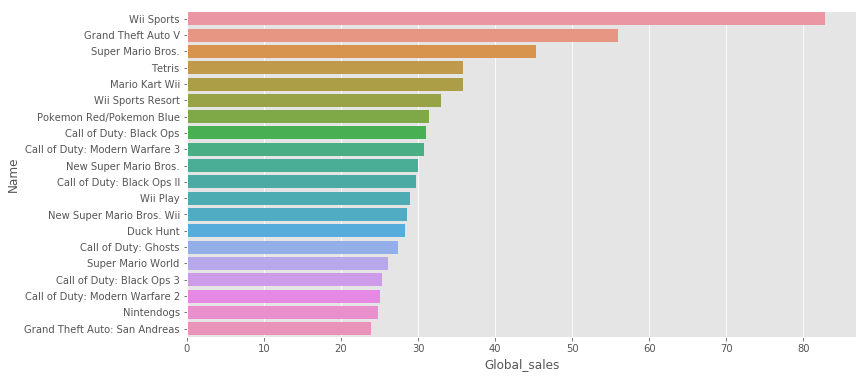

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(y=name.index[0:20],x='Global_sales',data=name[0:20])

游戏种类销售情况图

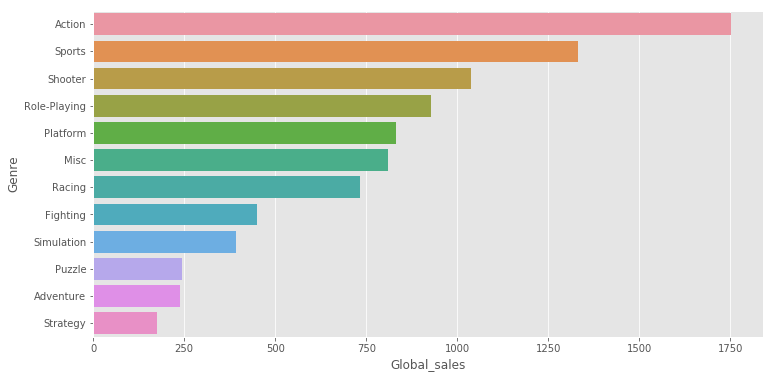

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(y=genre.index,x='Global_sales',data=genre)

各游戏发布平台销售情况图

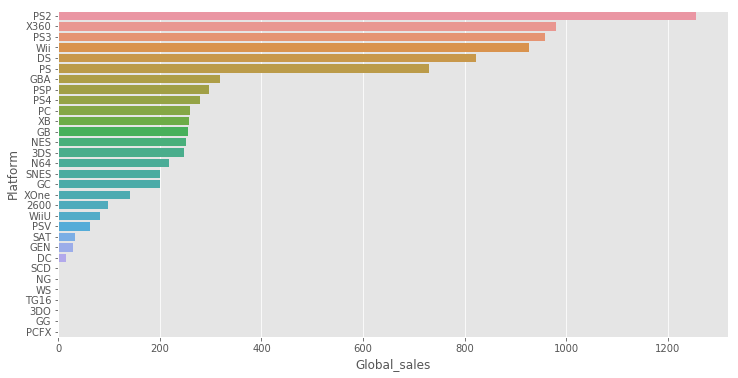

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(y=platform.index,x='Global_sales',data=platform)

各游戏发布商销售情况图

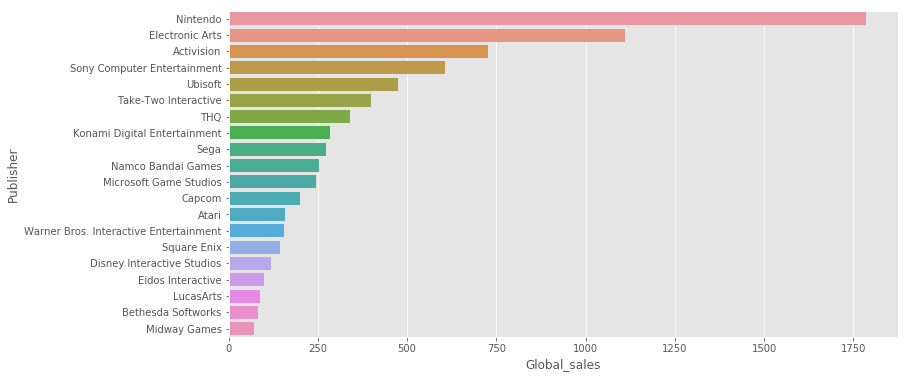

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(y=publisher.index[0:20],x='Global_sales',data=publisher[0:20])

##4.2销售趋势可视化##

五大最受欢迎游戏种类的销售趋势图

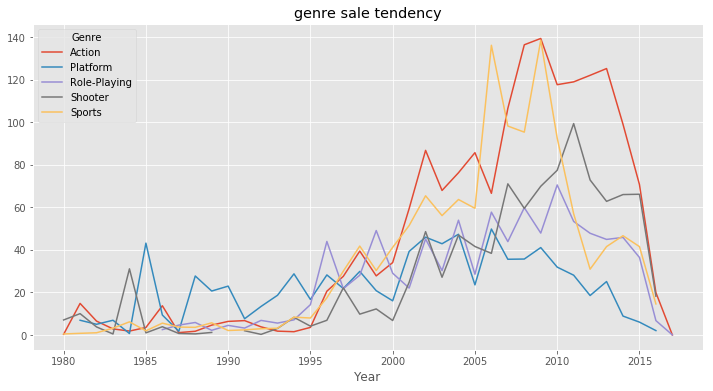

In [63]:
data_genre=data[data['Genre'].isin(genre.index[0:5])]
plot_genre=pd.pivot_table(data_genre,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum)
plot_genre.plot(title='genre sale tendency',figsize=(12,6))

五大最受欢迎游戏发布平台的销售趋势

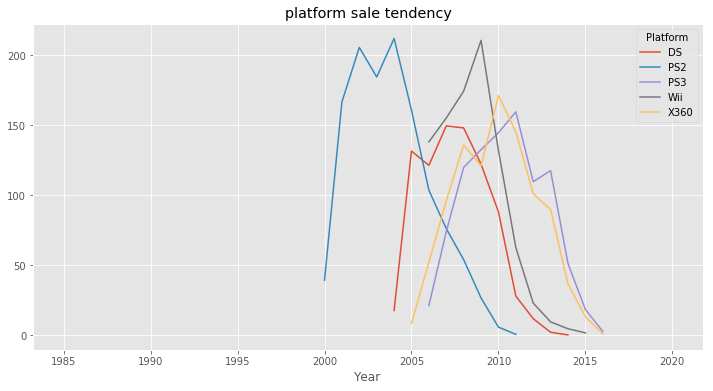

In [64]:
data_platform=data[data['Platform'].isin(platform.index[0:5])]
plot_platform=pd.pivot_table(data_platform,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum)
plot_platform.plot(title='platform sale tendency',figsize=(12,6))

五大最受欢迎游戏发行商销售趋势

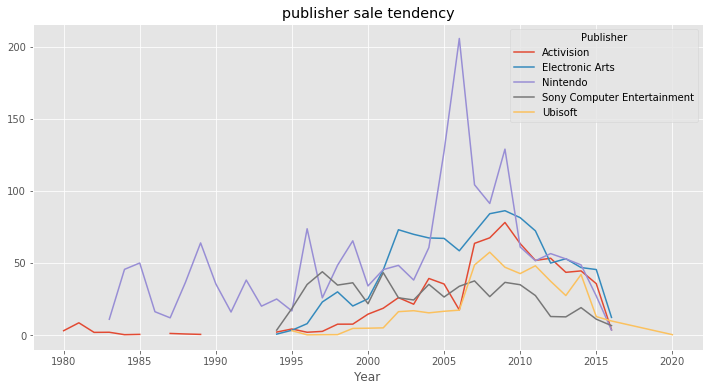

In [65]:
data_publisher=data[data['Publisher'].isin(publisher.index[0:5])]
plot_publisher=pd.pivot_table(data_publisher,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
plot_publisher.plot(title='publisher sale tendency',figsize=(12,6))